In [2]:
#! pip install --upgrade pandas

In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
EV_df = pd.read_csv("/content/drive/MyDrive/University Shit /ECO475/Data/Electric_Vehicle_Population_Size_History_By_County.csv") 
EV_df["County-State"] = EV_df["County"] + "-" + EV_df["State"]
EV_df.dropna(inplace = True)
passengers = EV_df[EV_df["Vehicle Primary Use"] == "Passenger"]
passengers.reset_index(drop = True, inplace = True)
passengers

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,County-State
0,January 31 2017,Juneau,AK,Passenger,0,1,1,58,59,1.69,Juneau-AK
1,January 31 2017,Dale,AL,Passenger,0,1,1,66,67,1.49,Dale-AL
2,January 31 2017,Lee,AL,Passenger,1,0,1,35,36,2.78,Lee-AL
3,January 31 2017,Maricopa,AZ,Passenger,3,1,4,1942,1946,0.21,Maricopa-AZ
4,January 31 2017,Pima,AZ,Passenger,0,2,2,464,466,0.43,Pima-AZ
...,...,...,...,...,...,...,...,...,...,...,...
12997,December 31 2022,Whatcom,WA,Passenger,2043,772,2815,143938,146753,1.92,Whatcom-WA
12998,December 31 2022,Whitman,WA,Passenger,109,64,173,21308,21481,0.81,Whitman-WA
12999,December 31 2022,Yakima,WA,Passenger,413,208,621,160786,161407,0.38,Yakima-WA
13000,December 31 2022,Douglas,WI,Passenger,1,0,1,1,2,50.00,Douglas-WI


In [7]:
def cleanCounty(s):
  s = s.replace("County", "")
  s = s.replace("Census Area", "")
  s = s.replace("City and Borough", "")
  s = s.replace("Borough", "")
  s = s.replace("Municipality", "")
  s = s.replace("Municipio", "")
  s = s.replace("Parish", "")
  s = s.replace("city", "")
  return s.strip()

In [8]:
pop = pd.read_excel("/content/drive/MyDrive/University Shit /ECO475/Data/County Level Population Estimates.xlsx")
pop = pop.dropna()
pop.reset_index(drop = True, inplace = True)
pop["County Name"] = pop["Area name"].apply(lambda x : cleanCounty(x))
pop["County-State"] = pop["County Name"] + "-" + pop["State"]

pop

,Federal Information Processing Standards (FIPS) Code,State,Area name,Rural-Urban Continuum Code 2013,Population 1990,Population 2000,Population 2010,Population 2020,Population 2021,County Name,County-State
0,1001,AL,Autauga County,2.0,34222.0,43751.0,54571.0,58805.0,59095.0,Autauga,Autauga-AL
1,1003,AL,Baldwin County,3.0,98280.0,140416.0,182265.0,231767.0,239294.0,Baldwin,Baldwin-AL
2,1005,AL,Barbour County,6.0,25417.0,29042.0,27457.0,25223.0,24964.0,Barbour,Barbour-AL
3,1007,AL,Bibb County,1.0,16598.0,19856.0,22915.0,22293.0,22477.0,Bibb,Bibb-AL
4,1009,AL,Blount County,1.0,39248.0,50982.0,57322.0,59134.0,59041.0,Blount,Blount-AL
...,...,...,...,...,...,...,...,...,...,...,...
3208,72145,PR,Vega Baja Municipio,1.0,55997.0,61916.0,59662.0,54414.0,53897.0,Vega Baja,Vega Baja-PR
3209,72147,PR,Vieques Municipio,7.0,8602.0,9106.0,9301.0,8249.0,8224.0,Vieques,Vieques-PR
3210,72149,PR,Villalba Municipio,2.0,23559.0,27910.0,26073.0,22093.0,21813.0,Villalba,Villalba-PR
3211,72151,PR,Yabucoa Municipio,1.0,36483.0,39121.0,37941.0,30426.0,30186.0,Yabucoa,Yabucoa-PR


In [9]:
educ = pd.read_excel("/content/drive/MyDrive/University Shit /ECO475/Data/County level Education.xlsx")
educ = educ.dropna()
educ.reset_index(drop = True, inplace = True)
educ["County Name"] = educ["Area name"].apply(lambda x : cleanCounty(x))
educ["County-State"] = educ["County Name"] + "-" + educ["State"]

educ

,Federal Information Processing Standard (FIPS) Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2007-11","High school diploma only, 2007-11","Some college or associate's degree, 2007-11","Bachelor's degree or higher, 2007-11","Percent of adults with less than a high school diploma, 2007-11","Percent of adults with a high school diploma only, 2007-11","Percent of adults completing some college or associate's degree, 2007-11",Percent of adults with a bachelor's degree or higher 2007-11,"Less than a high school diploma, 2016-20","High school diploma only, 2016-20","Some college or associate's degree, 2016-20","Bachelor's degree or higher, 2016-20","Percent of adults with less than a high school diploma, 2016-20","Percent of adults with a high school diploma only, 2016-20","Percent of adults completing some college or associate's degree, 2016-20",Percent of adults with a bachelor's degree or higher 2015-19,County Name,County-State
0,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,767.0,54.8,31.1,7.7,6.4,7074.0,6145.0,2104.0,2117.0,40.6,35.2,12.1,12.1,6252.0,6671.0,4912.0,3026.0,30.0,32.0,23.5,14.5,5872.0,9332.0,7413.0,4972.0,21.3,33.8,26.9,18.0,4685.0,12113.0,10305.0,7478.0,13.547902,35.027905,29.799601,21.624592,4273.0,11880.0,10986.0,10721.0,11.286318,31.378764,29.017433,28.317485,Autauga,Autauga-AL
1,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,2038.0,59.4,26.7,7.4,6.5,18125.0,15380.0,6602.0,5498.0,39.7,33.7,14.5,12.1,17309.0,20544.0,15900.0,10870.0,26.8,31.8,24.6,16.8,17258.0,28428.0,28178.0,22146.0,18.0,29.6,29.3,23.1,15094.0,36271.0,39216.0,33869.0,12.128566,29.145038,31.511450,27.214946,14823.0,42272.0,48832.0,49636.0,9.528615,27.173557,31.390498,31.907330,Baldwin,Baldwin-AL
2,1005,AL,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,861.0,68.8,19.0,4.9,7.3,7759.0,3671.0,1362.0,1300.0,55.1,26.1,9.7,9.2,6965.0,4258.0,2622.0,1857.0,44.4,27.1,16.7,11.8,6679.0,6124.0,4025.0,2068.0,35.3,32.4,21.3,10.9,5216.0,6249.0,4829.0,2630.0,27.562883,33.021560,25.517861,13.897696,4497.0,6361.0,4872.0,2067.0,25.268304,35.741979,27.375400,11.614317,Barbour,Barbour-AL
3,1007,AL,Bibb County,1.0,1.0,1.0,1.0,5272.0,1402.0,238.0,302.0,73.1,19.4,3.3,4.2,5254.0,2611.0,536.0,433.0,59.5,29.6,6.1,4.9,4850.0,3407.0,1332.0,476.0,

In [10]:
unem = pd.read_excel("/content/drive/MyDrive/University Shit /ECO475/Data/County Level Unemployment.xlsx")
unem = unem.dropna()
unem.reset_index(drop = True, inplace = True)
unem["County Name"] = unem["Area_name"].apply(lambda x : cleanCounty(x))
unem["County Name"] = unem["County Name"].apply(lambda x : x.split()[0])
unem["County-State"] = unem["County Name"] + "-" + unem["State"]

unem

,FIPS_code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,Civilian_labor_force_2001,Employed_2001,Unemployed_2001,Unemployment_rate_2001,Civilian_labor_force_2002,Employed_2002,Unemployed_2002,Unemployment_rate_2002,Civilian_labor_force_2003,Employed_2003,Unemployed_2003,Unemployment_rate_2003,Civilian_labor_force_2004,Employed_2004,Unemployed_2004,Unemployment_rate_2004,Civilian_labor_force_2005,Employed_2005,Unemployed_2005,Unemployment_rate_2005,Civilian_labor_force_2006,Employed_2006,Unemployed_2006,Unemployment_rate_2006,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,Unemployment_rate_2008,Civilian_labor_force_2009,Employed_2009,Unemployed_2009,Unemployment_rate_2009,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,Employed_2012,Unemployed_2012,Unemployment_rate_2012,Civilian_labor_force_2013,Employed_2013,Unemployed_2013,Unemployment_rate_2013,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020,County Name,County-State
0,1001,AL,"Autauga County, AL",2.0,2.0,1.0,21861.0,20971.0,890.0,4.1,22081.0,21166.0,915.0,4.1,22161.0,21096.0,1065.0,4.8,22695.0,21557.0,1138.0,5.0,23241.0,22146.0,1095.0,4.7,23887.0,22986.0,901.0,3.8,24425.0,23619.0,806.0,3.3,24434.0,23610.0,824.0,3.4,24687.0,23376.0,1311.0,5.3,24660.0,22464.0,2196.0,8.9,25749.0,23481.0,2268.0,8.8,25845.0,23688.0,2157.0,8.3,25762.0,23932.0,1830.0,7.1,25783.0,24155.0,1628.0,6.3,25639.0,24150.0,1489.0,5.8,25541.0,24206.0,1335.0,5.2,25710.0,24395.0,1315.0,5.1,26269.0,25224.0,1045.0,4.0,26475.0,25524.0,951.0,3.6,26684.0,25920.0,764.0,2.9,26405.0,24985.0,1420.0,5.4,26341.0,25599.0,742.0,2.8,67565.0,125.217762,Autauga,Autauga-AL
1,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,69979.0,67370.0,2609.0,3.7,69569.0,66545.0,3024.0,4.3,69379.0,65881.0,3498.0,5.0,72598.0,69010.0,3588.0,4.9,74843.0,71061.0,3782.0,5.1,76608.0,73581.0,3027.0,4.0,79806.0,77263.0,2543.0,3.2,82829.0,80213.0,2616.0,3.2,83205.0,79222.0,3983.0,4.8,82314.0,74950.0,7364.0,8.9,83551.0,75283.0,8268.0,9.9,85077.0,77459.0,7618.0,9.0,84507.0,77973.0,6534.0,7.7,85206.0,79466.0,5740.0,6.7,86546.0,81265.0,5281.0,6.1,87493.0,82619.0,4874.0,5.6,89778.0,84972.0,4806.0,5.4,93152.0,89286.0,3866.0,4.2,96252.0,92769.0,3483.0,3.6,98921.0,96044.0,2877.0,2.9,98910.0,92751.0,6159.0,6.2,99427.0,96481.0,2946.0,3.0,71135.0,131.834019,Baldwin,Baldwin-AL
2,1005,AL,"Barbour County, AL",6.0,6.0,0.0,11449.0,10812.0,637.0,5.6,11324.0,10468.0,856.0,7.6,11006.0,10154.0,852.0,7.7,11019.0,10241.0,778.0,7.1,10639.0,9884.0,755.0,7.1,10730.0,10114.0,616.0,5.7,10713.0,10110.0,603.0,5.6,10363.0,9698.0,665.0,6.4,10175.0,9249.0,926.0,9.1,9944.0,8635.0,1309.0,13.2,10219.0,8978.0,1241.0,12.1,9843.0,8716.0,1127.0,11.4,9377.0,8273.0,1104.0,11.8,9096.0,8152.0,944.0,10.4,8859.0,7930.0,929.0,10.5,8590.0,7823.0,767.0,8.9,8334.0,7638.0,696.0,8.4,8415.0,7914.0,501.0,6.0,8505.0,8071.0,434.0,5.1,8637.0,8292.0,345.0,4.0,8680.0,8004.0,676.0,7.8,8197.0,7728.0,469.0,5.7,38866.0,72.030097,Barbour,Barbour-AL
3,1007,AL,"Bibb County, AL",1.0,1.0,1.0,8623.0,8160.0,463.0,5.4,9134.0,8513.0,621.0,6.8,8961.0

In [11]:
pov = pd.read_excel("/content/drive/MyDrive/University Shit /ECO475/Data/County Level Poverty Estimates.xlsx")
pov.dropna(subset = ["Urban_Influence_Code_2013"], inplace = True)
pov.reset_index(drop = True, inplace = True)
pov["County Name"] = pov["Area_name"].apply(lambda x : cleanCounty(x))
pov["County-State"] = pov["County Name"] + "-" + pov["State"]

pov

,FIPS_code,State,Area_name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2020,CI90LBALL_2020,CI90UBALL_2020,PCTPOVALL_2020,CI90LBALLP_2020,CI90UBALLP_2020,POV017_2020,CI90LB017_2020,CI90UB017_2020,PCTPOV017_2020,CI90LB017P_2020,CI90UB017P_2020,POV517_2020,CI90LB517_2020,CI90UB517_2020,PCTPOV517_2020,CI90LB517P_2020,CI90UB517P_2020,MEDHHINC_2020,CI90LBINC_2020,CI90UBINC_2020,POV04_2020,CI90LB04_2020,CI90UB04_2020,PCTPOV04_2020,CI90LB04P_2020,CI90UB04P_2020,County Name,County-State
0,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6242.0,4930.0,7554.0,11.2,8.8,13.6,1912.0,1327.0,2497.0,14.9,10.3,19.5,1378.0,926.0,1830.0,14.5,9.7,19.3,67565.0,59132.0,75998.0,NaN,NaN,NaN,NaN,NaN,NaN,Autauga,Autauga-AL
1,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,20189.0,15535.0,24843.0,8.9,6.8,11.0,5907.0,3802.0,8012.0,12.4,8.0,16.8,4192.0,2677.0,5707.0,11.8,7.5,16.1,71135.0,66540.0,75730.0,NaN,NaN,NaN,NaN,NaN,NaN,Baldwin,Baldwin-AL
2,1005,AL,Barbour County,6.0,6.0,6.0,6.0,5548.0,4210.0,6886.0,25.5,19.3,31.7,1857.0,1291.0,2423.0,37.5,26.1,48.9,1303.0,888.0,1718.0,35.8,24.4,47.2,38866.0,33510.0,44222.0,NaN,NaN,NaN,NaN,NaN,NaN,Barbour,Barbour-AL
3,1007,AL,Bibb County,1.0,1.0,1.0,1.0,3549.0,2712.0,4386.0,17.8,13.6,22.0,941.0,663.0,1219.0,21.9,15.4,28.4,681.0,481.0,881.0,22.1,15.6,28.6,50907.0,43627.0,58187.0,NaN,NaN,NaN,NaN,NaN,NaN,Bibb,Bibb-AL
4,1009,AL,Blount County,1.0,1.0,1.0,1.0,7525.0,6034.0,9016.0,13.1,10.5,15.7,2456.0,1877.0,3035.0,18.9,14.4,23.4,1515.0,1069.0,1961.0,15.8,11.1,20.5,55203.0,47820.0,62586.0,NaN,NaN,NaN,NaN,NaN,NaN,Blount,Blount-AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56037,WY,Sweetwater County,5.0,8.0,5.0,8.0,3187.0,2435.0,3939.0,7.6,5.8,9.4,893.0,573.0,1213.0,8.4,5.4,11.4,587.0,360.0,814.0,7.3,4.5,10.1,70583.0,61835.0,79331.0,NaN,NaN,NaN,NaN,NaN,NaN,Sweetwater,Sweetwater-WY
3137,56039,WY,Teton County,7.0,8.0,7.0,8.0,1207.0,896.0,1518.0,5.2,3.9,6.5,176.0,108.0,244.0,4.3,2.6,6.0,114.0,66.0,162.0,3.8,2.2,5.4,92488.0,82976.0,102000.0,NaN,NaN,NaN,NaN,NaN,NaN,Teton,Teton-WY
3138,56041,WY,Uinta County,7.0,8.0,7.0,8.0,1697.0,1279.0,2115.0,8.5,6.4,10.6,535.0,330.0,740.0,9.7,6.0,13.4,354.0,210.0,498.0,8.3,4.9,11.7,71246.0,61861.0,80631.0,NaN,NaN,NaN,NaN,NaN,NaN,Uinta,Uinta-WY
3139,56043,WY,Washakie County,7.0,11.0,7.0,11.0,739.0,537.0,941.0,9.7,7.0,12.4,175.0,97.0,253.0,10.7,5.9,15.5,148.0,87.0,209.0,11.7,6.8,16.6,58532.0,50245.0,66819.0,NaN,NaN,NaN,NaN,NaN,NaN,Washakie,Washakie-WY


In [12]:
merged = pd.merge(passengers, pop, how = "left", on = "County-State")
merged = pd.merge(merged, educ, how = "left", left_on = "Federal Information Processing Standards (FIPS) Code", right_on = "Federal Information Processing Standard (FIPS) Code")
merged = pd.merge(merged, unem, how = "left", left_on = "Federal Information Processing Standards (FIPS) Code", right_on = "FIPS_code")
merged = pd.merge(merged, pov, how = "left", on = "FIPS_code")
merged.dropna(axis = 1, how = "all", inplace = True)
merged['Date']= pd.to_datetime(merged['Date'])

#merged = merged.T.drop_duplicates().T
merged

#note: the reason there are more rows in the merged dataset than the pre-merge tables is because of city-county name conflicts regarding independent cities and the counties they are in, I will just aggregate them

<ipython-input-12-88dc7a7ef2d1>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'State_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged = pd.merge(merged, unem, how = "left", left_on = "Federal Information Processing Standards (FIPS) Code", right_on = "FIPS_code")
<ipython-input-12-88dc7a7ef2d1>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'County Name_x', 'County-State_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged = pd.merge(merged, pov, how = "left", on = "FIPS_code")


,Date,County,State_x,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,County-State_x,Federal Information Processing Standards (FIPS) Code,State_y,Area name_x,Rural-Urban Continuum Code 2013,Population 1990,Population 2000,Population 2010,Population 2020,Population 2021,County Name_x,Federal Information Processing Standard (FIPS) Code,State_x,Area name_y,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2007-11","High school diploma only, 2007-11","Some college or associate's degree, 2007-11","Bachelor's degree or higher, 2007-11","Percent of adults with less than a high school diploma, 2007-11","Percent of adults with a high school diploma only, 2007-11","Percent of adults completing some college or associate's degree, 2007-11",Percent of adults with a bachelor's degree or higher 2007-11,"Less than a high school diploma, 2016-20","High school diploma only, 2016-20","Some college or associate's degree, 2016-20","Bachelor's degree or higher, 2016-20","Percent of adults with less than a high school diploma, 2016-20","Percent of adults with a high school diploma only, 2016-20","Percent of adults completing some college or associate's degree, 2016-20",Percent of adults with a bachelor's degree or higher 2015-19,County Name_y,County-State_y,FIPS_code,State_y,Area_name_x,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,Civilian_labor_force_2001,Employed_2001,Unemployed_2001,Unemployment_rate_2001,Civilian_labor_force_2002,Employed_2002,Unemployed_2002,Unemployment_rate_2002,Civilian_labor_force_2003,Employed_2003,Unemployed_2003,Unemployment_rate_2003,Civilian_labor_force_2004,Employed_2004,Unemployed_2004,Unemployment_rate_2004,Civilian_labor_force_2005,Employed_2005,Unemployed_2005,Unemployment_rate_2005,Civilian_labor_force_2006,Employed_2006,Unemployed_2006,Unemployment_rate_2006,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,Unemployment_rate_2008,Civilian_labor_force_2009,Employed_2009,Unemployed_2009,Unemployment_rate_2009,Civilia

In [13]:
merged[merged["FIPS_code"].isnull().values]

,Date,County,State_x,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,County-State_x,Federal Information Processing Standards (FIPS) Code,State_y,Area name_x,Rural-Urban Continuum Code 2013,Population 1990,Population 2000,Population 2010,Population 2020,Population 2021,County Name_x,Federal Information Processing Standard (FIPS) Code,State_x,Area name_y,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2007-11","High school diploma only, 2007-11","Some college or associate's degree, 2007-11","Bachelor's degree or higher, 2007-11","Percent of adults with less than a high school diploma, 2007-11","Percent of adults with a high school diploma only, 2007-11","Percent of adults completing some college or associate's degree, 2007-11",Percent of adults with a bachelor's degree or higher 2007-11,"Less than a high school diploma, 2016-20","High school diploma only, 2016-20","Some college or associate's degree, 2016-20","Bachelor's degree or higher, 2016-20","Percent of adults with less than a high school diploma, 2016-20","Percent of adults with a high school diploma only, 2016-20","Percent of adults completing some college or associate's degree, 2016-20",Percent of adults with a bachelor's degree or higher 2015-19,County Name_y,County-State_y,FIPS_code,State_y,Area_name_x,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,Civilian_labor_force_2001,Employed_2001,Unemployed_2001,Unemployment_rate_2001,Civilian_labor_force_2002,Employed_2002,Unemployed_2002,Unemployment_rate_2002,Civilian_labor_force_2003,Employed_2003,Unemployed_2003,Unemployment_rate_2003,Civilian_labor_force_2004,Employed_2004,Unemployed_2004,Unemployment_rate_2004,Civilian_labor_force_2005,Employed_2005,Unemployed_2005,Unemployment_rate_2005,Civilian_labor_force_2006,Employed_2006,Unemployed_2006,Unemployment_rate_2006,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,Unemployment_rate_2008,Civilian_labor_force_2009,Employed_2009,Unemployed_2009,Unemployment_rate_2009,Civilia

In [14]:
stations = pd.read_csv("/content/drive/MyDrive/University Shit /ECO475/Data/stations merged.csv") 
elec_stations = stations[stations["Fuel Type Code"] == "ELEC"]
elec_stations

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (17,41,53,61,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,zip,county,usps_zip_pref_city,usps_zip_pref_state,res_ratio,bus_ratio,oth_ratio,tot_ratio
3,3,ELEC,MASSPORT TAXI-01-02,56 Harborside Dr,NaN,Boston,MA,2128,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,ChargePoint Network,http://www.chargepoint.com/,GPS,42.360420,-71.026920,2023-01-26,146955,2023-01-26 23:17:47 UTC,NaN,NaN,NaN,2019-10-14,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2128,25025,EAST BOSTON,MA,1.000000,1.0,1.0,1.000000
4,4,ELEC,MASSPORT EG-02-05,237 Prescott St Economy Garage - North Side L,NaN,Boston,MA,2128,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,http://www.chargepoint.com/,GPS,42.376170,-71.026265,2023-01-26,149919,2023-01-26 23:17:18 UTC,NaN,NaN,NaN,2019-12-12,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2128,25025,EAST BOSTON,MA,1.000000,1.0,1.0,1.000000
5,5,ELEC,MASSPORT BG-03-04,200 Terminal Rd Term B Garage - Northeastern,NaN,Boston,MA,2128,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,http://www.chargepoint.com/,GPS,42.363445,-71.018620,2023-01-26,149928,2023-01-26 23:16:52 UTC,NaN,NaN,NaN,2019-12-12,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2128,25025,EAST BOSTON,MA,1.000000,1.0,1.0,1.000000
6,6,ELEC,MASSPORT LIMO-01-02,40 Tomahawk Dr,NaN,Boston,MA,2128,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,http://www.chargepoint.com/,GPS,42.365505,-71.026405,2023-01-26,149933,2023-01-26 23:14:47 UTC,NaN,NaN,NaN,2019-12-12,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2128,25025,EAST BOSTON,MA,1.000000,1.0,1.0,1.000000
7,7,ELEC,MASSPORT RIDE_APP-01-07,226 Porter St,NaN,Boston,MA,2128,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,ChargePoint Network,http://www.chargepoint.com/,GPS,42.370525,-71.029490,2023-01-26,149934,2023-01-26 23:17:47 UTC,NaN,NaN,NaN,2019-12-12,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2128,25025,EAST BOSTON,MA,1.000000,1.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73197,73197,ELEC,Candlewood Suites - Cotulla,547 Las Palmas Blvd,NaN,Cotulla,TX,78014,NaN,866-350-2738,E,NaN,Public - Credit car

In [15]:
def aggStations(stations_df, fips, date):
  filtered1 = stations_df[stations_df["county"] == fips]
  filtered2 = filtered1[pd.to_datetime(filtered1["Open Date"]) < date]

  return len(filtered2.index)

In [16]:
container = []

for index, row in merged.iterrows():
  fips = int(row["Federal Information Processing Standards (FIPS) Code"])
  date = pd.to_datetime(row["Date"])

  container.append(aggStations(elec_stations, fips, date))

merged["n_charging_stations"] = container

In [17]:
merged["year"] = merged["Date"].apply(lambda x : pd.to_datetime(x).year)
merged = merged[set(merged.columns)]
merged = merged.T.groupby(level=0).first().T
merged

,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,Area name_x,Area name_y,Area_name_x,Area_name_y,"Bachelor's degree or higher, 1990","Bachelor's degree or higher, 2000","Bachelor's degree or higher, 2007-11","Bachelor's degree or higher, 2016-20",Battery Electric Vehicles (BEVs),CI90LB017P_2020,CI90LB017_2020,CI90LB517P_2020,CI90LB517_2020,CI90LBALLP_2020,CI90LBALL_2020,CI90LBINC_2020,CI90UB017P_2020,CI90UB017_2020,CI90UB517P_2020,CI90UB517_2020,CI90UBALLP_2020,CI90UBALL_2020,CI90UBINC_2020,Civilian_labor_force_2000,Civilian_labor_force_2001,Civilian_labor_force_2002,Civilian_labor_force_2003,Civilian_labor_force_2004,Civilian_labor_force_2005,Civilian_labor_force_2006,Civilian_labor_force_2007,Civilian_labor_force_2008,Civilian_labor_force_2009,Civilian_labor_force_2010,Civilian_labor_force_2011,Civilian_labor_force_2012,Civilian_labor_force_2013,Civilian_labor_force_2014,Civilian_labor_force_2015,Civilian_labor_force_2016,Civilian_labor_force_2017,Civilian_labor_force_2018,Civilian_labor_force_2019,Civilian_labor_force_2020,Civilian_labor_force_2021,County,County Name_x,County Name_y,County-State_x,County-State_y,Date,Electric Vehicle (EV) Total,Employed_2000,Employed_2001,Employed_2002,Employed_2003,Employed_2004,Employed_2005,Employed_2006,Employed_2007,Employed_2008,Employed_2009,Employed_2010,Employed_2011,Employed_2012,Employed_2013,Employed_2014,Employed_2015,Employed_2016,Employed_2017,Employed_2018,Employed_2019,Employed_2020,Employed_2021,FIPS_code,Federal Information Processing Standard (FIPS) Code,Federal Information Processing Standards (FIPS) Code,"Four years of college or higher, 1970","Four years of college or higher, 1980","High school diploma only, 1970","High school diploma only, 1980","High school diploma only, 1990","High school diploma only, 2000","High school diploma only, 2007-11","High school diploma only, 2016-20","Less than a high school diploma, 1970","Less than a high school diploma, 1980","Less than a high school diploma, 1990","Less than a high school diploma, 2000","Less than a high school diploma, 2007-11","Less than a high school diploma, 2016-20",MEDHHINC_2020,Med_HH_Income_Percent_of_State_Total_2020,Median_Household_Income_2020,Metro_2013,Non-Electric Vehicle Total,PCTPOV017_2020,PCTPOV517_2020,PCTPOVALL_2020,POV017_2020,POV517_2020,POVALL_2020,Percent Electric Vehicles,"Percent of adults completing four years of college or higher, 1970","Percent of adults completing four years of college or higher, 1980","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing some college or associate's degree, 1990","Percent of adults completing some college or associate's degree, 2000","Percent of adults completing some college or associate's degree, 2007-11","Percent of adults completing some college or associate's degree, 2016-20",Percent of adults with a bachelor's degree or higher 2007-11,Percent of adults with a bachelor's degree or higher 2015-19,"Percent of adults with a bachelor's degree or higher, 1990","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with a high school diploma only, 1970","Percent of adults with a high school diploma only, 1980","Percent of adults with a high school diploma only, 1990","Percent of adults with a high school diploma only, 2000","Percent of adults with a high school diploma only, 2007-11","Percent of adults with a high school diploma only, 2016-20","Percent of adults with less than a high school diploma, 1970","Percent of adults with less than a high school diploma, 1980","Percent of adults with less than a high school diploma, 1990","Percent of adults with less than a high school diploma, 2000","Percent of adults with less than a high school diploma, 2007-11","Percent of adults with less than a high school diploma, 2016-20",Plug-In Hybrid Electric Vehicles (PHEVs),Popu

In [18]:
#merged[["FIPS_code"]].dtypes

In [19]:
houses = pd.read_csv("/content/drive/MyDrive/University Shit /ECO475/Data/State Houses - verified.csv")
houses

,state_name,state_code,num_republicans,num_democrats,num_independents,year,percent_republican,republican_majority,republican_supermajority
0,Alabama,AL,72,33,0,2017,0.685714,1,1
1,Alabama,AL,72,33,0,2018,0.685714,1,1
2,Alabama,AL,77,28,0,2019,0.733333,1,1
3,Alabama,AL,77,28,0,2020,0.733333,1,1
4,Alabama,AL,77,28,0,2021,0.733333,1,1
...,...,...,...,...,...,...,...,...,...
295,Wyoming,WY,52,8,1,2018,0.852459,1,1
296,Wyoming,WY,50,9,1,2019,0.833333,1,1
297,Wyoming,WY,50,9,1,2020,0.833333,1,1
298,Wyoming,WY,51,7,2,2021,0.850000,1,1


In [20]:
senates = pd.read_csv("/content/drive/MyDrive/University Shit /ECO475/Data/States Senates - verified.csv")
senates

,state_name,state_code,num_republicans,num_democrats,num_independents,year,percent_republican,republican_majority,republican_supermajority
0,Alabama,AL,26,8,0,2017,0.764706,1,1
1,Alabama,AL,27,8,0,2018,0.771429,1,1
2,Alabama,AL,27,8,0,2019,0.771429,1,1
3,Alabama,AL,27,8,0,2020,0.771429,1,1
4,Alabama,AL,27,8,0,2021,0.771429,1,1
...,...,...,...,...,...,...,...,...,...
295,Wyoming,WY,27,3,0,2018,0.900000,1,1
296,Wyoming,WY,27,3,0,2019,0.900000,1,1
297,Wyoming,WY,27,3,0,2020,0.900000,1,1
298,Wyoming,WY,28,2,0,2021,0.933333,1,1


In [21]:
fedpol = pd.read_csv("/content/drive/MyDrive/University Shit /ECO475/Data/county elections 2019-2022 grouped processed.csv")
fedpol["year"] = fedpol["year"].astype("object")
fedpol

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,percent_rep,version,mode,year2,candidatevotes2,totalvotes2,percent_rep2,percentchange
0,2016,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,DONALD TRUMP,REPUBLICAN,18172,24973,0.727666,20220315,TOTAL,2020,19838,27770,0.714368,0.981725
1,2016,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,DONALD TRUMP,REPUBLICAN,72883,95215,0.765457,20220315,TOTAL,2020,83544,109679,0.761714,0.995110
2,2016,ALABAMA,AL,BARBOUR,1005.0,US PRESIDENT,DONALD TRUMP,REPUBLICAN,5454,10469,0.520967,20220315,TOTAL,2020,5622,10518,0.534512,1.026001
3,2016,ALABAMA,AL,BIBB,1007.0,US PRESIDENT,DONALD TRUMP,REPUBLICAN,6738,8819,0.764032,20220315,TOTAL,2020,7525,9595,0.784263,1.026479
4,2016,ALABAMA,AL,BLOUNT,1009.0,US PRESIDENT,DONALD TRUMP,REPUBLICAN,22859,25588,0.893348,20220315,TOTAL,2020,24711,27588,0.895716,1.002650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,2016,WYOMING,WY,SWEETWATER,56037.0,US PRESIDENT,DONALD TRUMP,REPUBLICAN,12154,17130,0.709515,20220315,TOTAL,2020,12229,16698,0.732363,1.032202
3147,2016,WYOMING,WY,TETON,56039.0,US PRESIDENT,DONALD TRUMP,REPUBLICAN,3921,12627,0.310525,20220315,TOTAL,2020,4341,14787,0.293569,0.945394
3148,2016,WYOMING,WY,UINTA,56041.0,US PRESIDENT,DONALD TRUMP,REPUBLICAN,6154,8470,0.726564,20220315,TOTAL,2020,7496,9459,0.792473,1.090712
3149,2016,WYOMING,WY,WASHAKIE,56043.0,US PRESIDENT,DONALD TRUMP,REPUBLICAN,2911,3814,0.763241,20220315,TOTAL,2020,3245,4032,0.804812,1.054466


In [22]:
governors = pd.read_csv("/content/drive/MyDrive/University Shit /ECO475/Data/Governors.csv")
governors

,state_code,state_name,governor_name,governor_party,year
0,AL,Alabama,Kay Ivey,Republican,2022
1,AL,Alabama,Kay Ivey,Republican,2021
2,AL,Alabama,Kay Ivey,Republican,2020
3,AL,Alabama,Kay Ivey,Republican,2019
4,AL,Alabama,Kay Ivey,Republican,2018
...,...,...,...,...,...
295,WY,Wyoming,Mark Gordon,Republican,2021
296,WY,Wyoming,Mark Gordon,Republican,2020
297,WY,Wyoming,Mark Gordon,Republican,2019
298,WY,Wyoming,Matt Mead,Republican,2018


In [23]:
def gasDateParse(m_d):
  splitted = m_d.split("-")

  splitted[1] = int(splitted[1])

  if splitted[1] >= 50:
    splitted[1] += 1900

  else:
    splitted[1] += 2000

  splitted[1] = str(splitted[1])

  return "/".join(splitted)

In [24]:
gas = pd.read_csv("/content/drive/MyDrive/University Shit /ECO475/Data/U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv")
gas["Month"] = gas["Month"].apply(lambda x : gasDateParse(x))
gas["Month"] = pd.to_datetime(gas["Month"]) + pd.offsets.MonthEnd(0)
gas

,Month,U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon
0,2023-01-31,3.445
1,2022-12-31,3.324
2,2022-11-30,3.799
3,2022-10-31,3.935
4,2022-09-30,3.817
...,...,...
353,1993-08-31,1.062
354,1993-07-31,1.078
355,1993-06-30,1.097
356,1993-05-31,1.100


In [25]:
merged = merged.merge(houses, how = "left", left_on = ["State", "year"], right_on = ["state_code", "year"])
merged = merged.merge(senates, how = "left", left_on = ["State", "year"], right_on = ["state_code", "year"])
merged["Federal Information Processing Standards (FIPS) Code"] = merged["Federal Information Processing Standards (FIPS) Code"].astype("float64")
merged = merged.merge(fedpol, how = "left", left_on = "Federal Information Processing Standards (FIPS) Code", right_on = "county_fips")
merged = merged.merge(gas, how = "left", left_on = "Date", right_on = "Month")
merged = merged.merge(governors, how = "left", left_on = ["state_po", "year_x"], right_on = ["state_code", "year"])
merged

,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,Area name_x,Area name_y,Area_name_x,Area_name_y,"Bachelor's degree or higher, 1990","Bachelor's degree or higher, 2000","Bachelor's degree or higher, 2007-11","Bachelor's degree or higher, 2016-20",Battery Electric Vehicles (BEVs),CI90LB017P_2020,CI90LB017_2020,CI90LB517P_2020,CI90LB517_2020,CI90LBALLP_2020,CI90LBALL_2020,CI90LBINC_2020,CI90UB017P_2020,CI90UB017_2020,CI90UB517P_2020,CI90UB517_2020,CI90UBALLP_2020,CI90UBALL_2020,CI90UBINC_2020,Civilian_labor_force_2000,Civilian_labor_force_2001,Civilian_labor_force_2002,Civilian_labor_force_2003,Civilian_labor_force_2004,Civilian_labor_force_2005,Civilian_labor_force_2006,Civilian_labor_force_2007,Civilian_labor_force_2008,Civilian_labor_force_2009,Civilian_labor_force_2010,Civilian_labor_force_2011,Civilian_labor_force_2012,Civilian_labor_force_2013,Civilian_labor_force_2014,Civilian_labor_force_2015,Civilian_labor_force_2016,Civilian_labor_force_2017,Civilian_labor_force_2018,Civilian_labor_force_2019,Civilian_labor_force_2020,Civilian_labor_force_2021,County,County Name_x,County Name_y,County-State_x,County-State_y,Date,Electric Vehicle (EV) Total,Employed_2000,Employed_2001,Employed_2002,Employed_2003,Employed_2004,Employed_2005,Employed_2006,Employed_2007,Employed_2008,Employed_2009,Employed_2010,Employed_2011,Employed_2012,Employed_2013,Employed_2014,Employed_2015,Employed_2016,Employed_2017,Employed_2018,Employed_2019,Employed_2020,Employed_2021,FIPS_code,Federal Information Processing Standard (FIPS) Code,Federal Information Processing Standards (FIPS) Code,"Four years of college or higher, 1970","Four years of college or higher, 1980","High school diploma only, 1970","High school diploma only, 1980","High school diploma only, 1990","High school diploma only, 2000","High school diploma only, 2007-11","High school diploma only, 2016-20","Less than a high school diploma, 1970","Less than a high school diploma, 1980","Less than a high school diploma, 1990","Less than a high school diploma, 2000","Less than a high school diploma, 2007-11","Less than a high school diploma, 2016-20",MEDHHINC_2020,Med_HH_Income_Percent_of_State_Total_2020,Median_Household_Income_2020,Metro_2013,Non-Electric Vehicle Total,PCTPOV017_2020,PCTPOV517_2020,PCTPOVALL_2020,POV017_2020,POV517_2020,POVALL_2020,Percent Electric Vehicles,"Percent of adults completing four years of college or higher, 1970","Percent of adults completing four years of college or higher, 1980","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing some college or associate's degree, 1990","Percent of adults completing some college or associate's degree, 2000","Percent of adults completing some college or associate's degree, 2007-11","Percent of adults completing some college or associate's degree, 2016-20",Percent of adults with a bachelor's degree or higher 2007-11,Percent of adults with a bachelor's degree or higher 2015-19,"Percent of adults with a bachelor's degree or higher, 1990","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with a high school diploma only, 1970","Percent of adults with a high school diploma only, 1980","Percent of adults with a high school diploma only, 1990","Percent of adults with a high school diploma only, 2000","Percent of adults with a high school diploma only, 2007-11","Percent of adults with a high school diploma only, 2016-20","Percent of adults with less than a high school diploma, 1970","Percent of adults with less than a high school diploma, 1980","Percent of adults with less than a high school diploma, 1990","Percent of adults with less than a high school diploma, 2000","Percent of adults with less than a high school diploma, 2007-11","Percent of adults with less than a high school diploma, 2016-20",Plug-In Hybrid Electric Vehicles (PHEVs),Popu

In [26]:
merged.to_csv("merged.csv")
files.download("merged.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Date', ylabel='Number of Counties'>

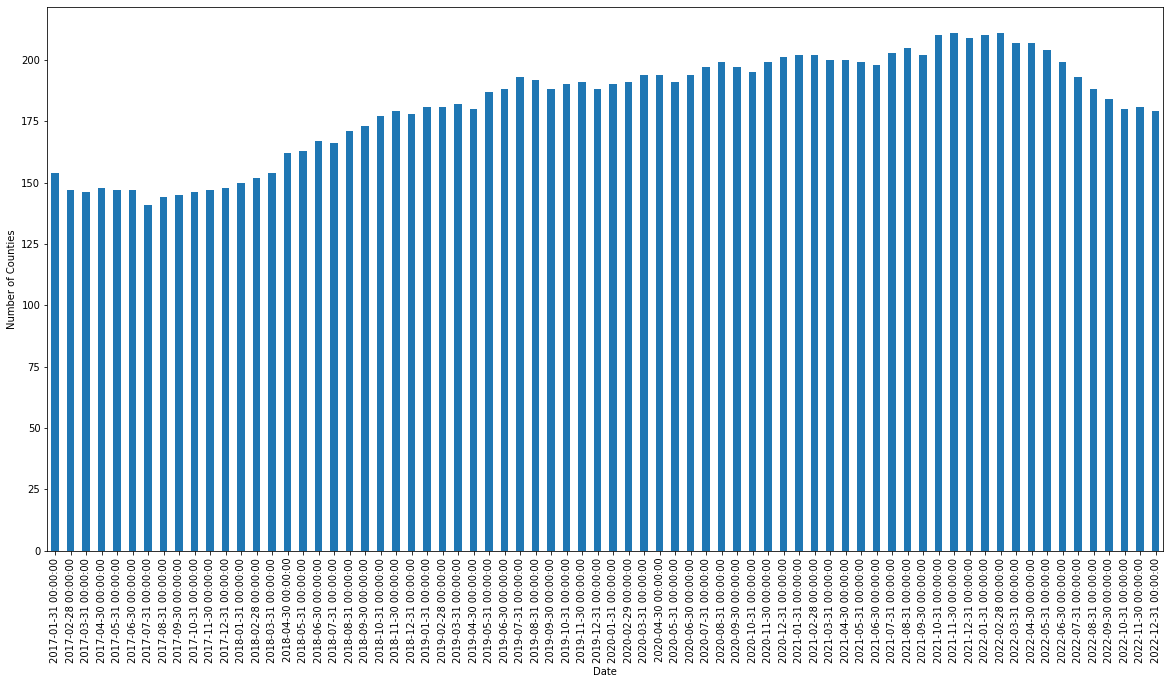

In [27]:
merged.groupby("Date")["Federal Information Processing Standards (FIPS) Code"].nunique().plot(xlabel = "Date", ylabel = "Number of Counties", figsize = (20, 10), kind = "bar")

<AxesSubplot:xlabel='Date', ylabel='Proportion of Total Counties'>

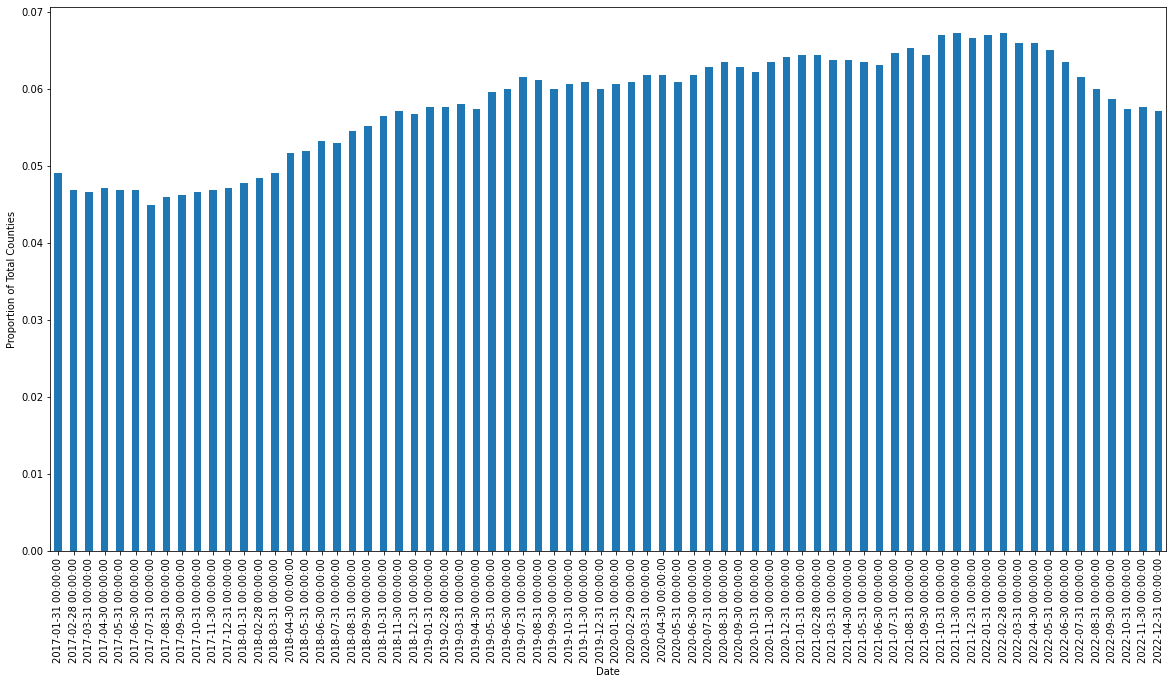

In [28]:
merged.groupby("Date")["Federal Information Processing Standards (FIPS) Code"].nunique().divide(3135).plot(xlabel = "Date", ylabel = "Proportion of Total Counties", figsize = (20, 10), kind = "bar")

Date
2017-01-31     94227743.0
2017-02-28     93472188.0
2017-03-31     92945150.0
2017-04-30     94496606.0
2017-05-31     92433122.0
                 ...     
2022-08-31    110662657.0
2022-09-30    108083504.0
2022-10-31    105391370.0
2022-11-30    103985282.0
2022-12-31    102690523.0
Name: Population 2021, Length: 72, dtype: float64


<AxesSubplot:xlabel='Date', ylabel='Population Counted'>

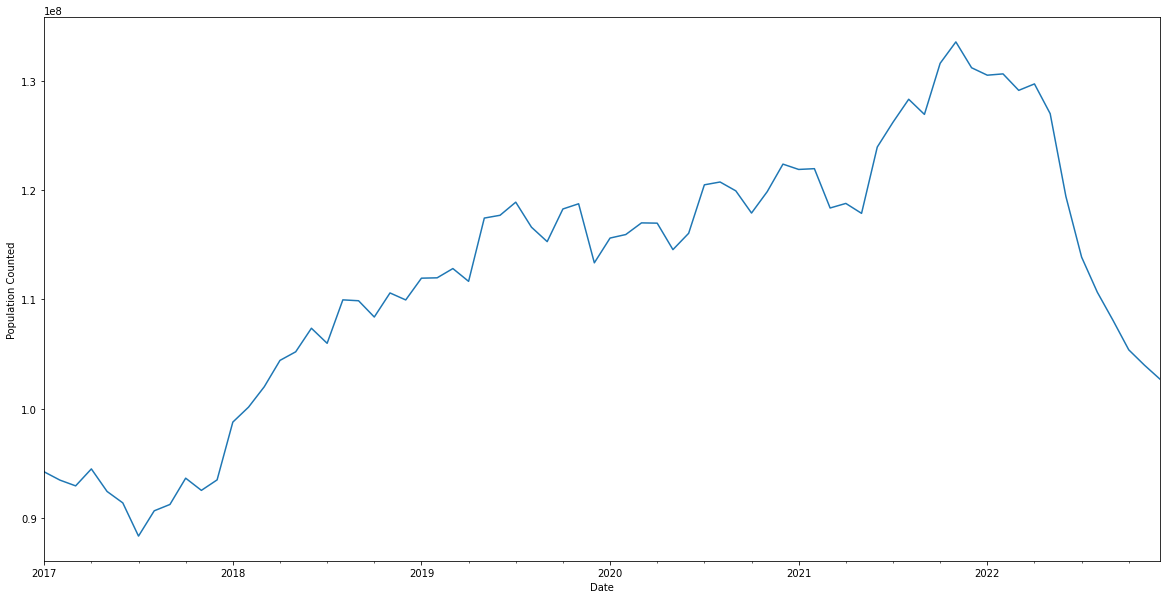

In [29]:
f = {
        'Federal Information Processing Standards (FIPS) Code' : 'unique', 
        'Population 2021' : 'sum'
}

g = merged.groupby("Date") 
print(g.agg(f)["Population 2021"])
g.agg(f)["Population 2021"].plot(xlabel = "Date", ylabel = "Population Counted", figsize = (20, 10), kind = "line")

<AxesSubplot:xlabel='Date', ylabel='Average EV % of Vehicle Population'>

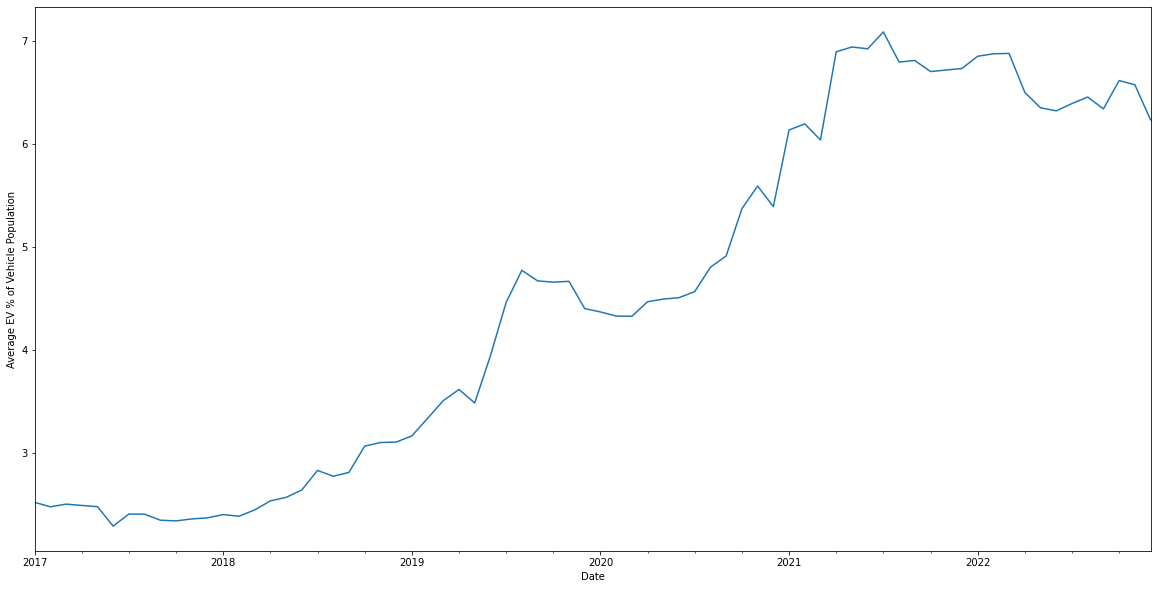

In [30]:
no_dupe = merged.drop_duplicates(subset = ["County-State_x", "Date"])
no_dupe.groupby("Date")["Percent Electric Vehicles"].mean().plot(xlabel = "Date", ylabel = "Average EV % of Vehicle Population", figsize = (20, 10), kind = "line")

<AxesSubplot:xlabel='Date', ylabel='Average County Population'>

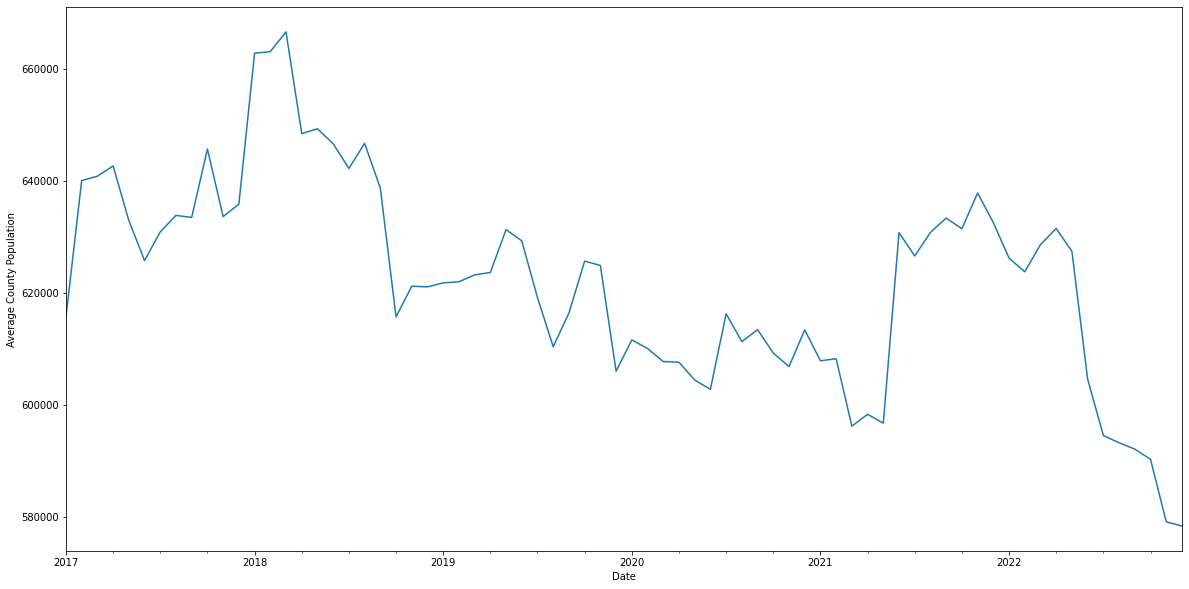

In [31]:
no_dupe.groupby("Date")["Population 2021"].mean().plot(xlabel = "Date", ylabel = "Average County Population", figsize = (20, 10), kind = "line")

<AxesSubplot:xlabel='Date', ylabel='Unemployment rate 2020'>

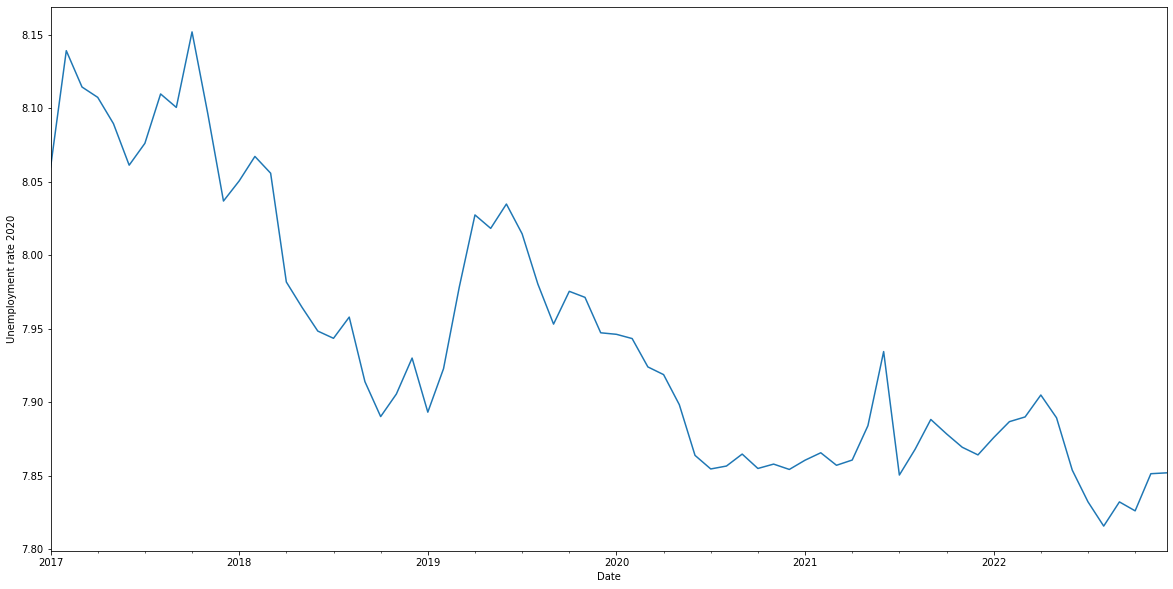

In [32]:
no_dupe.groupby("Date")["Unemployment_rate_2020"].mean().plot(xlabel = "Date", ylabel = "Unemployment rate 2020", figsize = (20, 10), kind = "line")

<AxesSubplot:xlabel='Date', ylabel='Mean County Poverty'>

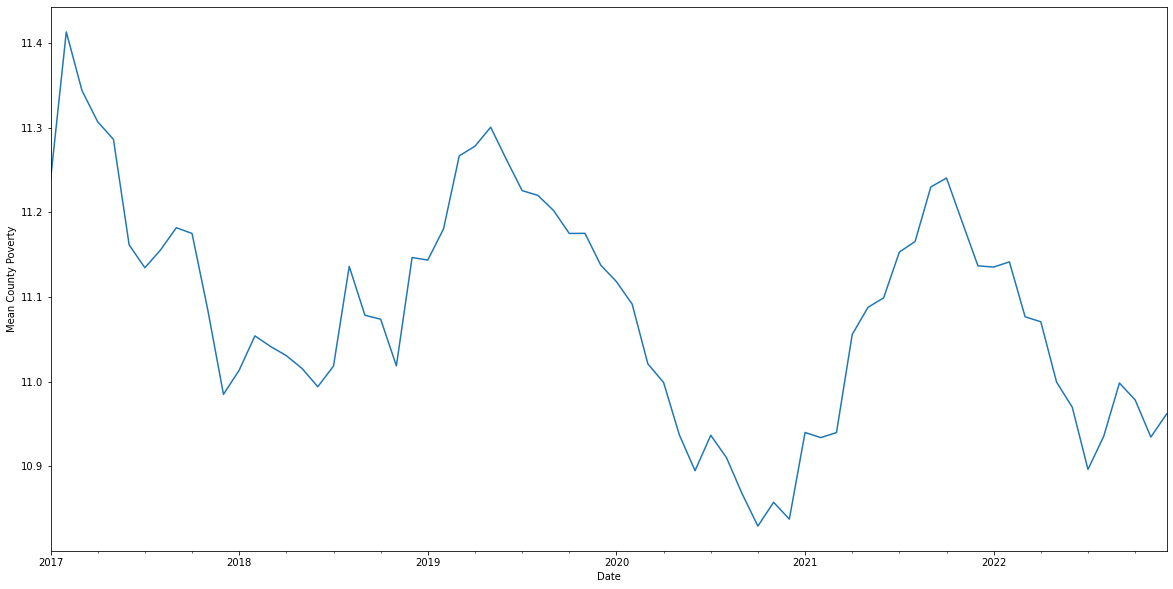

In [33]:
no_dupe.groupby("Date")["PCTPOVALL_2020"].mean().plot(xlabel = "Date", ylabel = "Mean County Poverty", figsize = (20, 10), kind = "line")

<AxesSubplot:xlabel='Date', ylabel="Percent of adults with a bachelor's degree or higher 2015-19">

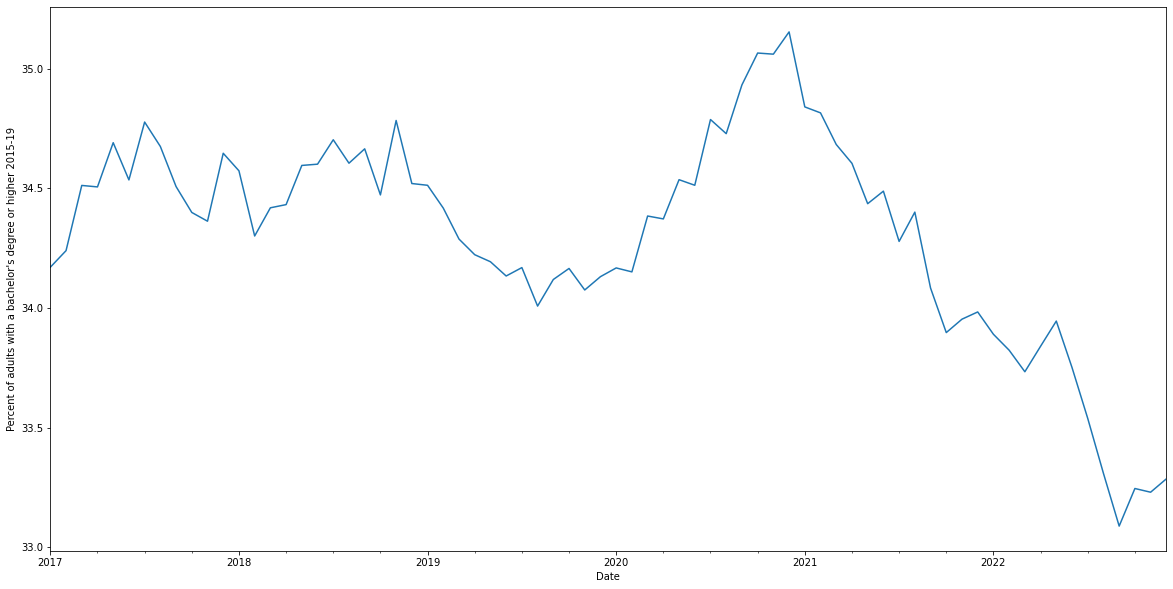

In [34]:
no_dupe.groupby("Date")["Percent of adults with a bachelor's degree or higher 2015-19"].mean().plot(xlabel = "Date", ylabel = "Percent of adults with a bachelor's degree or higher 2015-19", figsize = (20, 10), kind = "line")

<AxesSubplot:xlabel='Date', ylabel='2013 Rural-urban Continuum'>

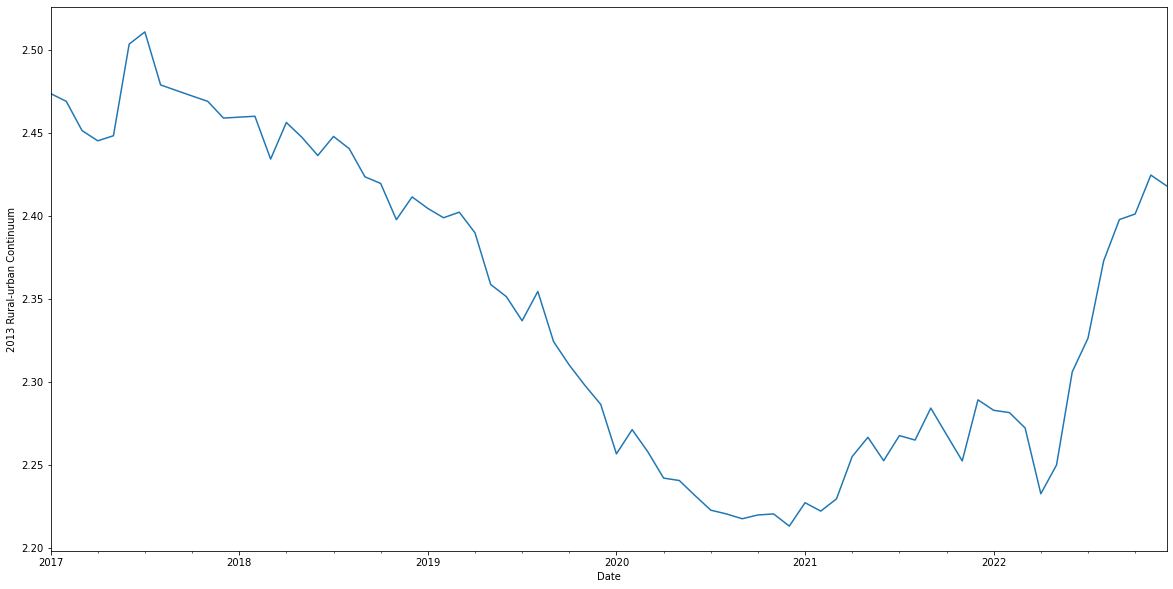

In [35]:
no_dupe.groupby("Date")["2013 Rural-urban Continuum Code"].mean().plot(xlabel = "Date", ylabel = "2013 Rural-urban Continuum", figsize = (20, 10), kind = "line")